In [1]:
# ライブラリ
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import japanize_matplotlib
import seaborn as sns
from tqdm import tqdm

In [2]:
# 訓練データ
train = pd.read_csv('./train.csv') #訓練データ
train.shape

(1721, 11)

In [3]:
train_add = pd.read_csv('./train_add.csv')
train_add.shape

(232, 11)

In [4]:
test = pd.read_csv('./test.csv')
test.shape

(313, 10)

In [5]:
stadium = pd.read_csv('./stadium.csv')
stadium.shape

(59, 3)

In [6]:
condition = pd.read_csv('./condition.csv')
condition.shape

(2034, 31)

In [7]:
condition_add = pd.read_csv('./condition_add.csv')
condition_add.shape

(270, 31)

In [8]:
add_2014 = pd.read_csv('./2014_add.csv')
add_2014.shape

(38, 10)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1721 entries, 0 to 1720
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1721 non-null   int64 
 1   y        1721 non-null   int64 
 2   year     1721 non-null   int64 
 3   stage    1721 non-null   object
 4   match    1721 non-null   object
 5   gameday  1721 non-null   object
 6   time     1721 non-null   object
 7   home     1721 non-null   object
 8   away     1721 non-null   object
 9   stadium  1721 non-null   object
 10  tv       1721 non-null   object
dtypes: int64(3), object(8)
memory usage: 148.0+ KB


In [10]:
train_new = pd.concat([train, train_add])
print(train.shape[0])
print(train_new.shape[0])
print(train_new.columns)

1721
1953
Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv'],
      dtype='object')


In [11]:
condition_new = pd.concat([condition, condition_add])
print(condition.shape[0])
print(condition_new.shape[0])

2034
2304


In [12]:
#train_newとconditionのidで結合
tmp = pd.merge(train_new, condition_new, on='id', how='left')
print(tmp.shape[1])
print(tmp.columns)

41
Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11'],
      dtype='object')


In [13]:
#スタジアム名で結合できそう？
data_all = pd.merge(tmp, stadium, left_on='stadium', right_on='name', how='left')
data_all.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_05,away_06,away_07,away_08,away_09,away_10,away_11,name,address,capa
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,ユアテックスタジアム仙台,宮城県仙台市泉区七北田字柳78,19694
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,...,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀,豊田スタジアム,愛知県豊田市千石町7-2,40000
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人,万博記念競技場,大阪府吹田市千里万博公園5-2,21000
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也,エディオンスタジアム広島,広島県広島市安佐南区大塚西5-1-1,50000
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,札幌ドーム,北海道札幌市豊平区羊ヶ丘1,39232


In [14]:
data_all.columns #nameとstadiumが被ってるからnameを消す

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'name', 'address', 'capa'],
      dtype='object')

In [15]:
data_all = data_all.drop(columns=['name'])

In [16]:
data_all.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa'],
      dtype='object')

In [17]:
data_all.to_csv('data_all.csv', index=None) #ここまで作ってきたstadium_newをcsv保存

In [18]:
data_all.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,中田 浩二,アレックス,青木 剛,増田 誓志,小笠原 満男,本山 雅志,大迫 勇也,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,...,カルフィン ヨン ア ピン,李 記帝,村松 大輔,河井 陽介,枝村 匠馬,高木 俊幸,アレックス,大前 元紀,愛知県豊田市千石町7-2,40000
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,伊野波 雅彦,相馬 崇人,三原 雅俊,田中 英雄,野沢 拓也,橋本 英郎,森岡 亮太,大久保 嘉人,大阪府吹田市千里万博公園5-2,21000
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,槙野 智章,平川 忠亮,鈴木 啓太,山田 直輝,梅崎 司,柏木 陽介,原口 元気,田中 達也,広島県広島市安佐南区大塚西5-1-1,50000
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,藤田 義明,山本 脩斗,小林 裕紀,山本 康裕,山田 大記,松浦 拓弥,菅沼 実,前田 遼一,北海道札幌市豊平区羊ヶ丘1,39232


In [19]:
#月を抜き出す
def get_month(x):
    return int(x[0:2])

data_all['month'] = data_all['gameday'].apply(get_month)
data_all['month'].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [20]:
#曜日を抜き出す
def get_week(x):
    return x[6]

data_all['week'] = data_all['gameday'].apply(get_week)
data_all['week'].unique()

array(['土', '日', '木', '水', '金', '火', '月'], dtype=object)

In [21]:
#節数を抜き出す
def get_match(x):
    return int(x[x.find('第')+1:x.find('節')])

data_all['match_num'] = data_all['match'].apply(get_match)
data_all['match_num'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42])

In [22]:
data_all.columns

Index(['id', 'y', 'year', 'stage', 'match', 'gameday', 'time', 'home', 'away',
       'stadium', 'tv', 'home_score', 'away_score', 'weather', 'temperature',
       'humidity', 'referee', 'home_team', 'home_01', 'home_02', 'home_03',
       'home_04', 'home_05', 'home_06', 'home_07', 'home_08', 'home_09',
       'home_10', 'home_11', 'away_team', 'away_01', 'away_02', 'away_03',
       'away_04', 'away_05', 'away_06', 'away_07', 'away_08', 'away_09',
       'away_10', 'away_11', 'address', 'capa', 'month', 'week', 'match_num'],
      dtype='object')

In [23]:
#湿度の％表示を消す
def get_humidity(x):
    return int(x[:-1])*0.01

data_all['humidity'] = data_all['humidity'].apply(get_humidity)
data_all['humidity'].unique()

array([0.66, 0.43, 0.41, 0.52, 0.32, 0.33, 0.65, 0.57, 0.46, 0.79, 0.8 ,
       0.68, 0.7 , 0.95, 0.83, 0.6 , 0.77, 0.51, 0.3 , 0.35, 0.58, 0.73,
       0.82, 0.62, 0.49, 0.64, 0.47, 0.5 , 0.25, 0.53, 0.26, 0.28, 0.63,
       0.2 , 0.31, 0.76, 0.93, 0.87, 0.78, 0.54, 0.36, 0.55, 0.34, 0.75,
       0.71, 0.39, 0.74, 0.59, 0.88, 0.9 , 0.85, 0.27, 0.48, 0.45, 0.4 ,
       0.69, 0.61, 0.56, 0.92, 0.96, 0.84, 0.94, 0.72, 0.91, 0.89, 0.86,
       0.81, 0.67, 0.38, 0.37, 0.44, 0.16, 0.18, 0.24, 0.42, 0.29, 0.23,
       0.22, 0.12, 0.21, 0.99, 0.97, 0.14, 0.13, 0.19, 0.98])

In [24]:
#欠損値確認
data_all.isnull()

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_07,away_08,away_09,away_10,away_11,address,capa,month,week,match_num
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1948,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1949,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1950,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1951,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
data_all.isnull().sum()

id             0
y              0
year           0
stage          0
match          0
gameday        0
time           0
home           0
away           0
stadium        0
tv             0
home_score     0
away_score     0
weather        0
temperature    0
humidity       0
referee        0
home_team      0
home_01        0
home_02        0
home_03        0
home_04        0
home_05        0
home_06        0
home_07        0
home_08        0
home_09        0
home_10        0
home_11        0
away_team      0
away_01        0
away_02        0
away_03        0
away_04        0
away_05        0
away_06        0
away_07        0
away_08        0
away_09        0
away_10        0
away_11        0
address        0
capa           0
month          0
week           0
match_num      0
dtype: int64

# 観客数に影響のある要素を探索

In [26]:
y = data_all['y'] #抜き出すとSeries型に変わる
type(y)

pandas.core.series.Series

In [27]:
data_all['match'].unique()

array(['第１節第１日', '第１節第２日', '第２節第１日', '第３節第１日', '第３節第２日', '第４節第１日',
       '第５節第１日', '第５節第２日', '第６節第１日', '第７節第１日', '第７節第２日', '第８節第１日',
       '第９節第１日', '第９節第２日', '第１０節第１日', '第１１節第１日', '第１２節第１日', '第１２節第２日',
       '第１３節第１日', '第１３節第２日', '第１４節第１日', '第１５節第１日', '第１６節第１日', '第１７節第１日',
       '第１８節第１日', '第１９節第１日', '第２０節第１日', '第２１節第１日', '第２２節第１日', '第２３節第１日',
       '第２４節第１日', '第２５節第１日', '第２６節第１日', '第２７節第１日', '第２８節第１日', '第２９節第１日',
       '第３０節第１日', '第３１節第１日', '第３２節第１日', '第３３節第１日', '第３４節第１日', '第１４節第２日',
       '第１６節第２日', '第１７節第２日', '第１８節第２日', '第３５節第１日', '第３６節第１日', '第３６節第２日',
       '第３６節第３日', '第３６節第４日', '第３７節第１日', '第３７節第２日', '第３８節第１日', '第３９節第１日',
       '第４０節第１日', '第４１節第１日', '第４２節第１日', '第６節第２日', '第８節第２日', '第２５節第２日',
       '第２６節第２日', '第２８節第２日', '第３０節第２日', '第１０節第２日', '第１１節第２日', '第１７節第３日',
       '第１９節第２日', '第３１節第２日', '第３３節第２日', '第３４節第２日', '第３５節第２日', '第１５節第２日',
       '第８節第３日'], dtype=object)

In [28]:
data_all['gameday'].unique()

array(['03/10(土)', '03/11(日)', '03/17(土)', '03/24(土)', '03/25(日)',
       '03/31(土)', '04/07(土)', '04/08(日)', '04/14(土)', '04/21(土)',
       '04/22(日)', '04/28(土)', '05/03(木・祝)', '06/27(水)', '05/06(日)',
       '05/12(土)', '05/19(土)', '05/20(日)', '05/25(金)', '05/26(土)',
       '06/16(土)', '06/23(土)', '06/30(土)', '07/07(土)', '07/14(土)',
       '07/28(土)', '08/04(土)', '08/11(土)', '08/18(土)', '08/25(土)',
       '09/01(土)', '09/15(土)', '09/22(土・祝)', '09/29(土)', '10/06(土)',
       '10/20(土)', '10/27(土)', '11/07(水)', '11/17(土)', '11/24(土)',
       '12/01(土)', '03/04(日)', '03/20(火・祝)', '04/01(日)', '04/15(日)',
       '04/27(金)', '04/30(月・休)', '05/17(木)', '05/13(日)', '05/27(日)',
       '06/01(金)', '06/02(土)', '06/09(土)', '06/13(水)', '06/17(日)',
       '06/24(日)', '07/01(日)', '07/08(日)', '07/15(日)', '07/22(日)',
       '07/29(日)', '08/05(日)', '08/12(日)', '08/19(日)', '08/22(水)',
       '08/26(日)', '09/02(日)', '09/14(金)', '09/17(月・祝)', '09/23(日)',
       '09/30(日)', '10/01(月)', '10/18(木)', '10/25(木)

In [29]:
data_all['weather'].unique()

array(['雨', '屋内', '晴一時雨', '曇一時雨のち晴', '晴', '曇', '晴時々曇', '雨のち曇', '曇時々雨',
       '曇時々晴', '曇のち雨', '雨のち晴', '晴のち曇', '晴のち曇一時雨', '曇のち晴', '晴一時曇', '曇一時雨',
       '曇一時雷雨のち曇', '晴のち雨', '雨時々曇', '晴時々雨', '晴時々雪', '雨時々晴', '曇時々雨のち晴',
       '晴のち曇時々雨', '雨のち曇時々晴', '雪のち雨', '曇のち雷雨', '曇一時晴一時雨', '曇一時晴',
       '曇時々晴一時雨', '曇のち雪', '雪'], dtype=object)

In [30]:
data_all['home'].unique()

array(['ベガルタ仙台', '名古屋グランパス', 'ガンバ大阪', 'サンフレッチェ広島', 'コンサドーレ札幌', 'サガン鳥栖',
       '川崎フロンターレ', '大宮アルディージャ', '柏レイソル', '浦和レッズ', '横浜Ｆ・マリノス', 'アルビレックス新潟',
       'セレッソ大阪', '清水エスパルス', 'ジュビロ磐田', 'ヴィッセル神戸', 'ＦＣ東京', '鹿島アントラーズ',
       '水戸ホーリーホック', '東京ヴェルディ', 'ヴァンフォーレ甲府', 'ＦＣ岐阜', 'ファジアーノ岡山', 'アビスパ福岡',
       '大分トリニータ', '愛媛ＦＣ', '湘南ベルマーレ', 'ギラヴァンツ北九州', '栃木ＳＣ', 'ＦＣ町田ゼルビア',
       '松本山雅ＦＣ', '徳島ヴォルティス', 'ザスパ草津', 'ロアッソ熊本', '京都サンガF.C.', 'ガイナーレ鳥取',
       'モンテディオ山形', '横浜ＦＣ', 'カターレ富山', 'ジェフユナイテッド千葉', 'ザスパクサツ群馬',
       'Ｖ・ファーレン長崎', 'カマタマーレ讃岐'], dtype=object)

In [31]:
#チーム名「ザスパ草津」を「ザスパクサツ群馬」に統一

#置換前の要素数
data_all['home'].nunique()

43

In [32]:
#置換
data_all = data_all.replace('ザスパ草津','ザスパクサツ群馬')

In [33]:
#置換後の要素数
data_all['home'].nunique()

42

In [34]:
data_all['temperature'].describe()

count    1953.000000
mean       20.438914
std         6.438737
min         1.400000
25%        15.800000
50%        21.400000
75%        25.600000
max        34.200000
Name: temperature, dtype: float64

In [35]:
data_all['humidity'].describe()

count    1953.000000
mean        0.602202
std         0.199531
min         0.120000
25%         0.440000
50%         0.630000
75%         0.770000
max         0.990000
Name: humidity, dtype: float64

In [36]:
data_all['capa'].describe()

count     1953.000000
mean     25688.549411
std      14016.934408
min       3560.000000
25%      15589.000000
50%      20246.000000
75%      30132.000000
max      72327.000000
Name: capa, dtype: float64

In [37]:
data_all['y'].describe() #最小値が0→外れ値（無観客？）

count     1953.000000
mean     10629.558116
std       8102.315189
min          0.000000
25%       4687.000000
50%       8594.000000
75%      13471.000000
max      62632.000000
Name: y, dtype: float64

In [38]:
data_all = data_all[data_all['y'] > 0]
data_all.shape[0]

1952

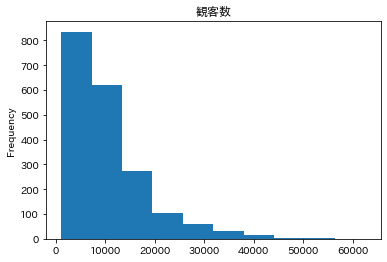

In [39]:
#yを可視化
y = data_all['y']
y.plot.hist(title='観客数')
plt.show()

In [40]:
data_all['stage'].value_counts()

Ｊ２    1188
Ｊ１     764
Name: stage, dtype: int64

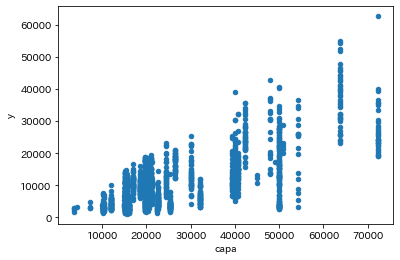

In [41]:
data_all.plot.scatter(x='capa', y='y')
plt.show() #相関高い

<AxesSubplot:xlabel='temperature', ylabel='y'>

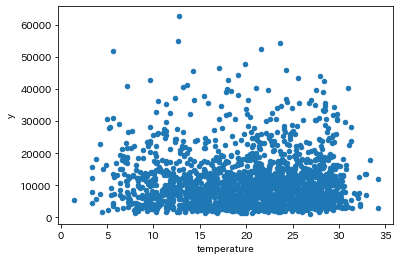

In [42]:
data_all.plot.scatter(x='temperature', y='y') #気温とyに相関はない

<AxesSubplot:xlabel='humidity', ylabel='y'>

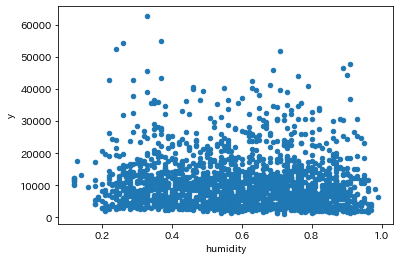

In [43]:
data_all.plot.scatter(x='humidity', y='y') #湿度とyに相関はない

<AxesSubplot:xlabel='stage', ylabel='y'>

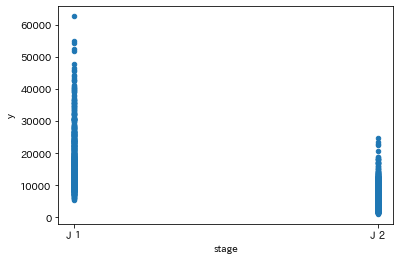

In [44]:
data_all.plot.scatter(x='stage', y='y') #J1のほうが観客数多い？

In [45]:
data_all.corr() #スタジアムのキャパとyは相関が高い

,id,y,year,home_score,away_score,temperature,humidity,capa,month,match_num
id,1.000000,-0.176920,0.942649,-0.025286,-0.008693,0.050131,-0.123654,-0.111546,-0.097166,-0.032474
y,-0.176920,1.000000,0.003211,0.056229,0.018226,-0.028072,-0.100557,0.688290,0.105861,-0.044138
year,0.942649,0.003211,1.000000,-0.019708,0.006581,-0.040849,-0.196105,0.014548,-0.259396,-0.258279
home_score,-0.025286,0.056229,-0.019708,1.000000,-0.008761,0.016518,0.060557,0.046978,0.078402,0.066140
away_score,-0.008693,0.018226,0.006581,-0.008761,1.000000,0.012447,0.042446,-0.007139,0.007625,-0.002658
temperature,0.050131,-0.028072,-0.040849,0.016518,0.012447,1.000000,0.192701,-0.031298,0.381236,0.427351
humidity,-0.123654,-0.100557,-0.196105,0.060557,0.042446,0.192701,1.000000,-0.068175,0.295952,0.304965
capa,-0.111546,0.688290,0.014548,0.046978,-0.007139,-0.031298,-0.068175,1.000000,0.006253,-0.088082
month,-0.097166,0.105861,-0.259396,0.078402,0.007625,0.381236,0.295952,0.006253,1.000000,0.957339
match_num,-0.032474,-0.044138,-0.258279,0.066140,-0.002658,0.427351,0.304965,-0.088082,0.957339,1.000000


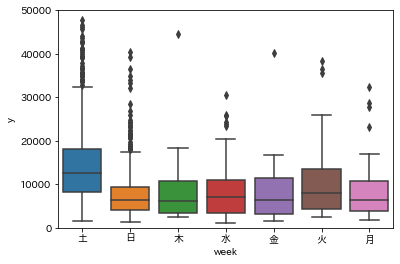

In [46]:
sns.boxplot(data=data_all, x='week', y='y')
plt.ylim(0,50000)
plt.show()

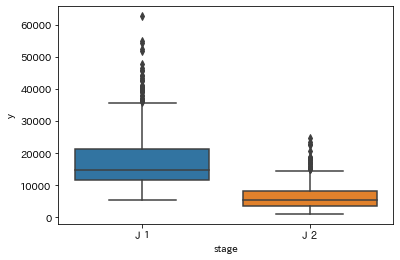

In [47]:
sns.boxplot(data=data_all, x='stage', y='y')
plt.show() #J1のほうが多い

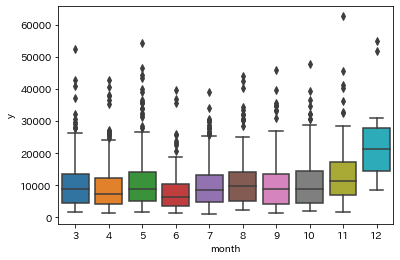

In [48]:
sns.boxplot(data=data_all, x='month', y='y')
plt.show() #12月が多い

In [49]:
data_J1 = data_all[data_all['stage']=='Ｊ１']
data_J1['stage'].unique()

array(['Ｊ１'], dtype=object)

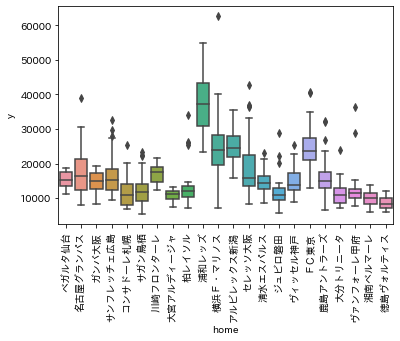

In [50]:
sns.boxplot(data=data_J1, x='home', y='y')
plt.xticks(rotation=90)
plt.show() #チームによって観客数にばらつきがある

In [51]:
data_all[['capa', 'week', 'home', 'away', 'month', 'stage']]

,capa,week,home,away,month,stage
0,19694,土,ベガルタ仙台,鹿島アントラーズ,3,Ｊ１
1,40000,土,名古屋グランパス,清水エスパルス,3,Ｊ１
2,21000,土,ガンバ大阪,ヴィッセル神戸,3,Ｊ１
3,50000,土,サンフレッチェ広島,浦和レッズ,3,Ｊ１
4,39232,土,コンサドーレ札幌,ジュビロ磐田,3,Ｊ１
...,...,...,...,...,...,...
1948,12000,日,水戸ホーリーホック,ザスパクサツ群馬,7,Ｊ２
1949,15576,日,愛媛ＦＣ,京都サンガF.C.,7,Ｊ２
1950,15454,土,横浜ＦＣ,ジュビロ磐田,7,Ｊ２
1951,12000,水,水戸ホーリーホック,Ｖ・ファーレン長崎,7,Ｊ２


In [52]:
#特徴量生成（放送局数）
def get_num(x):
    return len(x.split('／'))
data_all['tv_num'] = data_all['tv'].apply(get_num)

data_all['tv_num'].unique()

array([4, 3, 5, 2, 1])

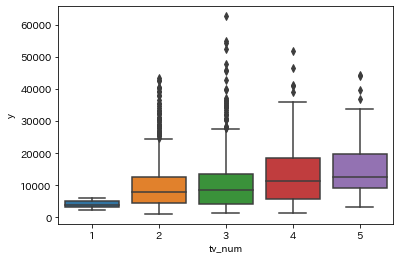

In [53]:
sns.boxplot(data=data_all, x='tv_num', y='y')
plt.show()

In [54]:
#気温と湿度を使って不快指数
data_all['di'] = 0.81*data_all['temperature']+0.01*data_all['humidity']*(0.99*data_all['temperature']-14.3)+46.3
data_all['di']

0       49.308449
1       56.335297
2       55.440237
3       55.518327
4       64.550520
          ...    
1948    64.923502
1949    67.605794
1950    70.198394
1951    67.126561
1952    68.980258
Name: di, Length: 1952, dtype: float64

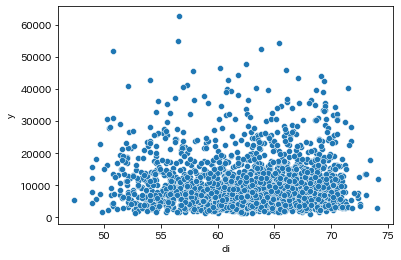

In [55]:
sns.scatterplot(data=data_all, x='di', y='y')
plt.show()

In [56]:
data_all['weather'].value_counts()

晴           969
曇           476
雨           186
屋内           55
曇のち雨         45
晴のち曇         33
雨のち曇         31
曇のち晴         30
曇時々雨         25
晴時々曇         23
曇一時雨         18
曇時々晴         18
晴のち雨          9
晴一時雨          7
雨のち晴          4
雨時々曇          4
晴一時曇          2
晴時々雨          2
雨のち曇時々晴       1
曇のち雪          1
曇時々晴一時雨       1
曇一時晴          1
曇一時晴一時雨       1
曇のち雷雨         1
雪のち雨          1
雨時々晴          1
晴のち曇時々雨       1
曇時々雨のち晴       1
晴時々雪          1
曇一時雷雨のち曇      1
曇一時雨のち晴       1
晴のち曇一時雨       1
雪             1
Name: weather, dtype: int64

In [57]:
#雷と雪はデータ数が極端に少ないので、雨に変える
data_all['weather'][data_all['weather'] == '雷'] = '雨'
data_all['weather'][data_all['weather'] == '雪'] = '雨'

/var/folders/41/791kfl912mbb2ndn2ly5_y240000gn/T/ipykernel_8571/3390665281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all['weather'][data_all['weather'] == '雷'] = '雨'
/var/folders/41/791kfl912mbb2ndn2ly5_y240000gn/T/ipykernel_8571/3390665281.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_all['weather'][data_all['weather'] == '雪'] = '雨'


In [58]:
select_columns = ['id', 'y', 'capa', 'home', 'away', 'stage', 'tv_num', 'month', 'weather']
dummy_data_all = pd.get_dummies(data_all[select_columns], drop_first = True)
dummy_columns = dummy_data_all.shape[1]

In [59]:
#予測データの分割
dummy_data = dummy_data_all[dummy_data_all['id'] <= 16084]
dummy_data_target = dummy_data_all[dummy_data_all['id'] >=16085]

print(dummy_data)
print(dummy_data_target)

         id      y   capa  tv_num  month  home_アルビレックス新潟  home_カターレ富山  \
0     13994  18250  19694       4      3               0            0   
1     13995  24316  40000       4      3               0            0   
2     13996  17066  21000       4      3               0            0   
3     13997  29603  50000       4      3               0            0   
4     13998  25353  39232       4      3               0            0   
...     ...    ...    ...     ...    ...             ...          ...   
1930  16048   3970  10202       2      4               0            0   
1931  16074   3870  20000       3      4               0            0   
1932  16075   3807  22338       3      4               0            0   
1933  16078   6781  25250       3      4               0            1   
1934  16080   5283  21292       2      4               0            0   

      home_カマタマーレ讃岐  home_ガイナーレ鳥取  home_ガンバ大阪  ...  weather_曇時々晴一時雨  \
0                 0             0           0  ...  

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
#観客数を変数y_1に代入
y_1 = dummy_data['y']
#ダミーデータから観客数とidを削除
dummy_data = dummy_data.drop(columns=['y', 'id'])
#学習データと評価データに分割
X_train, X_test, y_train, y_test = train_test_split(dummy_data, y_1, random_state=1234)

In [62]:
#分割後のデータ確認
X_train.shape

(1348, 117)

In [63]:
#分割後のデータ確認
X_test.shape

(450, 117)

In [64]:
#評価関数RMSEの準備
import numpy as np
from sklearn.metrics import mean_squared_error as MSE

In [65]:
#重回帰モデルの学習
from sklearn.linear_model import LinearRegression
#インスタンスを作成
lr = LinearRegression()
#学習
lr.fit(X_train, y_train)

LinearRegression()

In [66]:
#偏回帰係数と切片を確認
pd.DataFrame(lr.coef_ , index=X_train.columns)

,0
capa,0.286558
tv_num,451.187285
month,262.152382
home_アルビレックス新潟,11387.212877
home_カターレ富山,-2429.286032
...,...
weather_雨のち曇,-2293.651945
weather_雨のち曇時々晴,0.000000
weather_雨時々晴,5226.460861
weather_雨時々曇,-4710.416055


In [67]:
#学習済みモデルによる予測（学習データ）
y_pred_train = lr.predict(X_train)
y_pred_train

array([14518.85074168,  7116.49542854,  9859.7349597 , ...,
        7111.59544923, 34270.56542027, 26838.9850712 ])

In [68]:
#予測精度の評価（学習データ）
rmse_train = np.sqrt(MSE(y_train, y_pred_train))
rmse_train

3204.4663838073357

In [69]:
#学習済みモデルによる予測（評価データ）
y_pred_test = lr.predict(X_test)
y_pred_test

array([ 4039.92675898, 18671.71177522, 15167.90597322, 12223.33940938,
        4037.4842202 ,  5071.38442847,  4715.94326464,  9988.92358786,
        6583.69131714,  2556.7261763 ,  2164.838045  , 13589.01322472,
       14055.06052572,  4684.35046962,  4002.32473472, 21749.8921039 ,
        7430.26403001,  3288.8438156 ,  7864.32587636, 24082.30504375,
        4878.92839706,  4582.30596553,  5733.7199248 ,  5231.28004372,
       25092.95611998, 11381.80610426,  9041.23286716,  5154.59688928,
        5116.73092479, 22775.64924419, 17097.24342465,  8709.87812322,
        8610.27888124,  6626.99158877, 24375.11567477, 17825.19821907,
        6957.07676416,  5405.43778187, 16459.34784583,  2209.97712546,
       22333.4989913 ,  8731.73165281,  7105.16505611, 14328.28868104,
        6575.5909937 , 15801.50570569,  8133.20743902, 15614.27318463,
        7583.19536585, 18607.54027033,  7560.28296479, 24724.86782291,
       16519.58685672,  8696.38400445, 11799.31446645,  3084.40495673,
      

In [70]:
#予測精度の評価（評価データ）
rmse_test = np.sqrt(MSE(y_test, y_pred_test))

print(rmse_train)
print(rmse_test)

3204.4663838073357
3414.6629177896


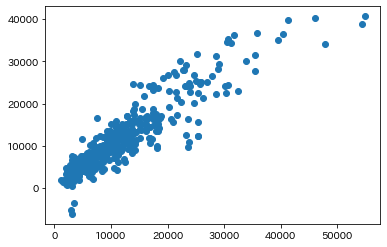

In [71]:
#予測精度の可視化
plt.scatter(y_test, y_pred_test)
plt.show()

In [72]:
#残差分析をしていく
#X_trainに予測値カラムpredを追加
X_train['pred'] = y_pred_train
#X_trainに実測値から予測値を引いた残差カラムを追加
X_train['res'] = y_train - X_train['pred']
#X_testに対しても同様の処理をする
X_test['pred'] = y_pred_test
X_test['res'] = y_test - X_test['pred']

In [73]:
#X_trainの下にX_testを結合してtmpデータフレームを作成
tmp = pd.concat([X_train, X_test])
#もとのデータの右にpredカラムとresカラムを結合
data = pd.concat([data_all, tmp[['pred','res']]], axis=1)
data.head()

,id,y,year,stage,match,gameday,time,home,away,stadium,...,away_11,address,capa,month,week,match_num,tv_num,di,pred,res
0,13994,18250,2012,Ｊ１,第１節第１日,03/10(土),14:04,ベガルタ仙台,鹿島アントラーズ,ユアテックスタジアム仙台,...,ジュニーニョ,宮城県仙台市泉区七北田字柳78,19694,3,土,1,4,49.308449,15241.639560,3.008360e+03
1,13995,24316,2012,Ｊ１,第１節第１日,03/10(土),14:04,名古屋グランパス,清水エスパルス,豊田スタジアム,...,大前 元紀,愛知県豊田市千石町7-2,40000,3,土,1,4,56.335297,19202.595397,5.113405e+03
2,13996,17066,2012,Ｊ１,第１節第１日,03/10(土),14:04,ガンバ大阪,ヴィッセル神戸,万博記念競技場,...,大久保 嘉人,大阪府吹田市千里万博公園5-2,21000,3,土,1,4,55.440237,12932.786590,4.133213e+03
3,13997,29603,2012,Ｊ１,第１節第１日,03/10(土),14:06,サンフレッチェ広島,浦和レッズ,エディオンスタジアム広島,...,田中 達也,広島県広島市安佐南区大塚西5-1-1,50000,3,土,1,4,55.518327,29603.000000,6.837945e-08
4,13998,25353,2012,Ｊ１,第１節第１日,03/10(土),14:04,コンサドーレ札幌,ジュビロ磐田,札幌ドーム,...,前田 遼一,北海道札幌市豊平区羊ヶ丘1,39232,3,土,1,4,64.550520,12413.295861,1.293970e+04


In [88]:
data.sort_values(by = 'res', ascending = False).head()

,id,y,year,stage,match,gameday,time,home,away,stadium,tv,home_score,away_score,weather,temperature,humidity,referee,home_team,home_01,home_02,home_03,home_04,home_05,home_06,home_07,home_08,home_09,home_10,home_11,away_team,away_01,away_02,away_03,away_04,away_05,away_06,away_07,away_08,away_09,away_10,away_11,address,capa,month,week,match_num,tv_num,di,pred,res,last_match,forlan
1844,15127,62632,2013,Ｊ１,第３３節第１日,11/30(土),14:04,横浜Ｆ・マリノス,アルビレックス新潟,日産スタジアム,スカパー！／スカパー！プレミアムサービス／ＮＨＫ総合,0,2,晴,12.7,0.33,家本 政明,横浜Ｆ・マリノス,榎本 哲也,小林 祐三,栗原 勇蔵,中澤 佑二,ドゥトラ,中町 公祐,富澤 清太郎,兵藤 慎剛,中村 俊輔,齋藤 学,マルキーニョス,アルビレックス新潟,東口 順昭,三門 雄大,舞行龍ジェームズ,大井 健太郎,金 珍洙,レオ シルバ,成岡 翔,田中 亜土夢,岡本 英也,田中 達也,川又 堅碁,神奈川県横浜市港北区小机町3300,72327,11,土,33,3,56.581301,30223.438367,32408.561633,1,0
1443,15765,38966,2014,Ｊ１,第１１節第１日,05/03(土・祝),19:04,名古屋グランパス,セレッソ大阪,豊田スタジアム,スカパー！／スカパー！プレミアムサービス／ＮＨＫ ＢＳ１／名古屋テレビ（録）,1,2,晴,17.8,0.33,山本 雄大,名古屋グランパス,楢﨑 正剛,矢野 貴章,ハーフナー ニッキ,田中 マルクス闘莉王,本多 勇喜,枝村 匠馬,田口 泰士,中村 直志,小川 佳純,玉田 圭司,永井 謙佑,セレッソ大阪,武田 博行,染谷 悠太,藤本 康太,酒本 憲幸,山下 達也,扇原 貴宏,山口 蛍,南野 拓実,丸橋 祐介,柿谷 曜一朗,フォルラン,愛知県豊田市千石町7-2,40000,5,土,11,4,60.728963,22096.949680,16869.050320,0,1
1409,15725,42723,2014,Ｊ１,第７節第２日,04/12(土),14:04,セレッソ大阪,ガンバ大阪,ヤンマースタジアム長居,スカパー！／スカパー！プレミアムサービス／ＮＨＫ大阪,2,2,晴,18.0,0.22,西村 雄一,セレッソ大阪,キム ジンヒョン,丸橋 祐介,酒本 憲幸,山下 達也,ゴイコ カチャル,長谷川 アーリアジャスール,山口 蛍,南野 拓実,杉本 健勇,柿谷 曜一朗,フォルラン,ガンバ大阪,東口 順昭,加地 亮,岩下 敬輔,丹羽 大輝,藤春 廣輝,内田 達也,今野 泰幸,阿部 浩之,大森 晃太郎,リンス,遠藤 保仁,大阪府大阪市東住吉区長居公園1-1,47816,4,土,7,3,60.887744,26669.247667,16053.752333,0,0
693,14852,52293,2013,Ｊ１,第２節第１日,03/09(土),16:05,浦和レッズ,名古屋グランパス,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／テレ玉（録）,1,0,晴,21.6,0.24,佐藤 隆治,浦和レッズ,加藤 順大,森脇 良太,永田 充,槙野 智章,梅崎 司,阿部 勇樹,鈴木 啓太,宇賀神 友弥,柏木 陽介,原口 元気,興梠 慎三,名古屋グランパス,楢﨑 正剛,田中 隼磨,ダニエル,増川 隆洋,阿部 翔平,小川 佳純,中村 直志,ダニルソン,藤本 淳吾,ヤキモフスキー,矢野 貴章,埼玉県さいたま市緑区中野田500,63700,3,土,2,3,63.813002,36646.802547,15646.197453,0,0
1463,15787,54350,2014,Ｊ１,第１４節第１日,05/17(土),14:04,浦和レッズ,セレッソ大阪,埼玉スタジアム２００２,スカパー！／スカパー！プレミアムサービス／ＮＨＫ総合,1,0,晴,23.6,0.26,木村 博之,浦和レッズ,西川 周作,森脇 良太,那須 大亮,槙野 智章,梅崎 司,青木 拓矢,阿部 勇樹,宇賀神 友弥,原口 元気,柏木 陽介,興梠 慎三,セレッソ大阪,キム ジンヒョン,藤本 康太,山下 達也,ゴイコ カチャル,長谷川 アーリアジャスール,山口 蛍,南野 拓実,丸橋 祐介,酒本 憲幸,柿谷 曜一朗,フォルラン,埼玉県さいたま市緑区中野田500,63700,5,土,14,3,65.439566,38784.610103,15565.389897,0,1


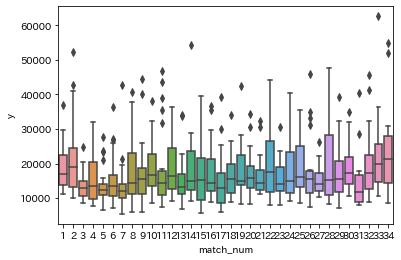

In [89]:
#節数の可視化
sns.boxplot(data=data[data['stage'] == 'Ｊ１'], x = 'match_num', y = 'y')
plt.show()

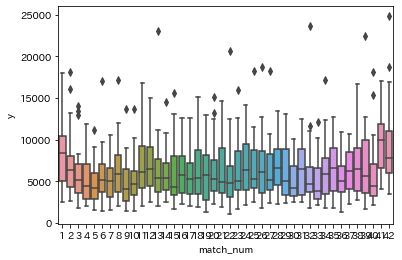

In [90]:
sns.boxplot(data=data[data['stage'] == 'Ｊ２'], x='match_num', y='y')
plt.show()

↑J1、J2ともに最後の2節は中央値が大きい？  
予測に使えそうなので、最後の2節かどうかを0、1で表すカラムを作成

In [91]:
data['last_match'] = 0
data['last_match'][((data['match_num'] == 33) | (data['match_num'] == 34)) & (data['stage'] == 'Ｊ１')] = 1
data['last_match'][((data['match_num'] == 41) | (data['match_num'] == 42)) & (data['stage'] == 'Ｊ２')] = 1

data['last_match'].value_counts()

/var/folders/41/791kfl912mbb2ndn2ly5_y240000gn/T/ipykernel_8571/109708588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_match'][((data['match_num'] == 33) | (data['match_num'] == 34)) & (data['stage'] == 'Ｊ１')] = 1
/var/folders/41/791kfl912mbb2ndn2ly5_y240000gn/T/ipykernel_8571/109708588.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['last_match'][((data['match_num'] == 41) | (data['match_num'] == 42)) & (data['stage'] == 'Ｊ２')] = 1


0    1872
1      80
Name: last_match, dtype: int64

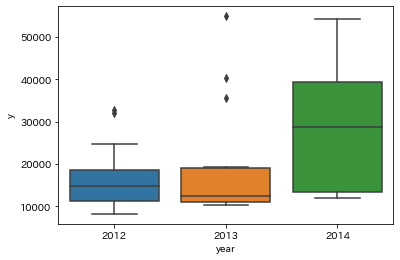

In [92]:
#2014年でawayのセレッソ大阪の試合は残差が大きい
sns.boxplot(data=data[data['away']=='セレッソ大阪'], x='year', y='y')
plt.show()

In [93]:
#2014年に世界的に有名なフォルラン選手がきた
#フォルランを見れるか、言い換えるとawayがセレッソ大阪かどうかの0、1カラムを作成
data['forlan'] = 0
data['forlan'][(data['away'] == 'セレッソ大阪') & (data['year'] == 2014)] = 1

data['forlan'].value_counts()

/var/folders/41/791kfl912mbb2ndn2ly5_y240000gn/T/ipykernel_8571/1011077637.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['forlan'][(data['away'] == 'セレッソ大阪') & (data['year'] == 2014)] = 1


0    1944
1       8
Name: forlan, dtype: int64

In [106]:
dummy_data_all['id']

0       13994
1       13995
2       13996
3       13997
4       13998
5       13999
6       14000
7       14001
8       14002
9       14004
10      14005
11      14006
12      14007
13      14008
14      14009
15      14010
16      14011
17      14012
18      14013
19      14014
20      14015
21      14016
22      14017
23      14018
24      14019
25      14021
26      14022
27      14024
28      14025
29      14026
30      14027
31      14028
32      14029
33      14030
34      14031
35      14032
36      14033
37      14034
38      14035
39      14036
40      14037
41      14038
42      14039
43      14040
44      14041
45      14042
46      14043
47      14044
48      14045
49      14046
50      14047
51      14048
52      14049
53      14050
54      14051
55      14052
56      14053
57      14054
58      14055
59      14056
60      14057
61      14058
62      14059
63      14060
64      14061
65      14062
66      14063
67      14064
68      14065
69      14066
70      14067
71    

In [139]:
#新しく作ったlast_matchカラム、forlanカラムを用いて2回目のモデリング

select_columns = ['id','y','capa','week','home','away','month','stage','tv_num','weather','last_match','forlan']
dummy_data_all = pd.get_dummies(data[select_columns], drop_first=True)

dummy_data = dummy_data_all[dummy_data_all['id'] <= 16084]
dummy_data_target = dummy_data_all[dummy_data_all['id'] >= 15773]
y_1 = dummy_data['y']
dummy_data = dummy_data.drop(columns=['id','y'])

X_train,X_test,y_train,y_test = train_test_split(dummy_data, y_1, random_state = 1234)

# モデルの作成
lr = LinearRegression()
# モデルの学習
lr.fit(X_train, y_train)

#訓練データの予測・精度評価
y_train_pred = lr.predict(X_train)
rmse_train = np.sqrt(MSE(y_train, y_train_pred))
print(rmse_train)

#テストデータの予測・精度評価
y_test_pred = lr.predict(X_test)
rmse_test = np.sqrt(MSE(y_test, y_test_pred))
print(rmse_test)

2965.3657528036433
3287.148041411052


In [140]:
# dummy_data_targetのyカラムを変数y_2に代入
y_2 = dummy_data_target['y']
# dummy_data_targetのidとyを削除
dummy_data_target = dummy_data_target.drop(columns = ['id', 'y'])
# dummy_data_targetを予測した結果を変数target_predに代入
target_pred = lr.predict(dummy_data_target)
rmse = np.sqrt(MSE(y_2, target_pred))
print(rmse)

2635.2618405843855


In [141]:
target_pred = pd.Series(target_pred, name='y')
submit_data = pd.concat([test['id'], target_pred], axis=1)
submit_data.to_csv('submission.csv', header=None, index=False)
submit_data.head()

,id,y
0,15822,12377.247726
1,15823,12090.724922
2,15824,16381.709847
3,15825,16774.385951
4,15827,15954.898442


In [142]:
print(target_pred.shape)
print(submit_data.shape)

(313,)
(313, 2)


In [143]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [144]:
submit_data.isnull()

,id,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False
